# <center> <h1>  🚢   👨‍💻  🚢

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sn

In [2]:
data = pd.read_csv("Datasets/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()
# age ustuni to'liq emas
# Cabin ustuni to'liq emas
# Embarked ustuni to'liq emas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <center>  Nan qiymatlarni to'ldirishga urinib ko'ramiz

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 1-bo'lib Embarkedni to'ldirishga urinib ko'ramimz
data["Embarked"].unique()
# 3 ta Titanicga chiqish joyi bo'lgan
# S = Sautgemton
# C = cherbourg
# Q = queenstown

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
sum(data["Embarked"]=="S")

644

In [8]:
sum(data["Embarked"]=="C")

168

In [9]:
sum(data["Embarked"]=="Q")

77

In [10]:
embarked_nan = data[(data["Embarked"]!="S") & (data["Embarked"]!="Q") & (data["Embarked"]!="C")]
embarked_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Agarda biz bilet narxi ularning qayerdan chiqganiga bo'g'liq deb hisoblaydigan bo'lsak
# Demak ular biletni 80 $ olgan bo'lsa biz 75$ katta va 85$ dan kichik bo'lgan boshqa yo'lovchilarning
# Embarked ni qarab ulardan eng ko'p uchraganini nan qiymatlarga o'zlashtiramiz
data[(data["Fare"]>75) & (data["Fare"]<85)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C


In [12]:
sub_data1 = data[(data["Fare"]>75) & (data["Fare"]<85)]
sub_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C


In [13]:
sum(sub_data1["Embarked"]=="S")

13

In [14]:
sum(sub_data1["Embarked"]=="C")

16

In [15]:
sum(sub_data1["Embarked"]=="Q")

0

In [16]:
# Demak bizda 80$ yaqin qarid qilingan biletlarning 16 tasi Embarked = C ekan
#  biz ham 2 ta nan datamizning Embarked = C qilib o'zgartiramiz
data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [17]:
data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                             NaN
Name: 829, dtype: object

In [18]:
data.loc[61, "Embarked"] = "C"
data.loc[829, "Embarked"] = "C"

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## <center> Xato kiritilgan datalar bormi shuni tekshirib chiqamiz

### <center> Endi Name ustinidan Mrs, Miss, Ms larni topamiz va ularni Jinsi to'g'ri kiritilganmi tekshirib chiqamiz

In [22]:
sub_data2 = data[["Name", "Sex"]]
sub_data2

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


In [23]:
sub_data2_list_index = []

for i in sub_data2.index:
    sub_data2_list_index.append(i)

sub_data2_list_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [24]:
sub_data2_list_name = np.array(sub_data2["Name"])
sub_data2_list_name

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [25]:
sub_data2_list_sex = np.array(sub_data2["Sex"])
sub_data2_list_sex

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [26]:
s = []

for i in range(len(sub_data2_list_name)):
    s.append((sub_data2_list_index[i], sub_data2_list_name[i], sub_data2_list_sex[i]))

s

[(0, 'Braund, Mr. Owen Harris', 'male'),
 (1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female'),
 (2, 'Heikkinen, Miss. Laina', 'female'),
 (3, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female'),
 (4, 'Allen, Mr. William Henry', 'male'),
 (5, 'Moran, Mr. James', 'male'),
 (6, 'McCarthy, Mr. Timothy J', 'male'),
 (7, 'Palsson, Master. Gosta Leonard', 'male'),
 (8, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female'),
 (9, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female'),
 (10, 'Sandstrom, Miss. Marguerite Rut', 'female'),
 (11, 'Bonnell, Miss. Elizabeth', 'female'),
 (12, 'Saundercock, Mr. William Henry', 'male'),
 (13, 'Andersson, Mr. Anders Johan', 'male'),
 (14, 'Vestrom, Miss. Hulda Amanda Adolfina', 'female'),
 (15, 'Hewlett, Mrs. (Mary D Kingcome) ', 'female'),
 (16, 'Rice, Master. Eugene', 'male'),
 (17, 'Williams, Mr. Charles Eugene', 'male'),
 (18, 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'female'),
 (19, 'Masselmani, Mrs. Fatim

In [27]:
a1=[]
a2=[]
a3=[]


for i in range(len(s)):
    if re.search(r"(Mrs|MRS|mrs|Miss|MISS|miss|MS|Ms|ms)", s[i][1]):
        a1.append((s[i][0]))
        a2.append(s[i][1])
        a3.append(s[i][2])

        

In [28]:
a1

[1,
 2,
 3,
 8,
 9,
 10,
 11,
 14,
 15,
 17,
 18,
 19,
 22,
 24,
 25,
 28,
 31,
 32,
 38,
 39,
 40,
 41,
 43,
 44,
 47,
 49,
 52,
 53,
 56,
 58,
 61,
 66,
 68,
 71,
 79,
 82,
 84,
 85,
 88,
 98,
 100,
 106,
 109,
 111,
 113,
 114,
 119,
 123,
 128,
 132,
 133,
 136,
 140,
 141,
 142,
 147,
 151,
 155,
 156,
 161,
 166,
 167,
 172,
 177,
 180,
 184,
 186,
 190,
 192,
 194,
 195,
 198,
 199,
 205,
 208,
 211,
 215,
 216,
 218,
 229,
 230,
 233,
 235,
 237,
 240,
 241,
 246,
 247,
 251,
 254,
 255,
 256,
 257,
 258,
 259,
 264,
 268,
 269,
 272,
 274,
 275,
 276,
 279,
 289,
 290,
 291,
 293,
 297,
 299,
 300,
 303,
 304,
 306,
 307,
 309,
 310,
 311,
 312,
 315,
 316,
 318,
 319,
 322,
 323,
 325,
 327,
 328,
 329,
 330,
 334,
 337,
 341,
 345,
 346,
 347,
 351,
 356,
 357,
 358,
 359,
 362,
 366,
 367,
 368,
 374,
 375,
 376,
 380,
 381,
 383,
 387,
 389,
 393,
 394,
 396,
 399,
 401,
 402,
 404,
 409,
 412,
 415,
 416,
 417,
 419,
 423,
 426,
 427,
 431,
 432,
 435,
 436,
 437,
 440,
 

In [29]:
a2

['Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'McGowan, Miss. Anna "Annie"',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'O\'Dwyer, Miss. Ellen "Nellie"',
 'Spencer, Mrs. William Augustus (Marie Eugenie)',
 'Glynn, Miss. Mary Agatha',
 'Vander Planke, Miss. Augusta Maria',
 'Nicola-Yarred, Miss. Jamila',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)',
 'Laroche, Miss. Simonne Marie Anne Andree',
 'Devaney, Miss. Margaret Delia',
 "O'D

In [30]:
a3

['female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'f

In [31]:
len(a1)

319

In [32]:
for i in range(len(a1)):
    for j in range(len(a1)):
        if a3[i]=="male":
            print(a2[i], " - ", a3[i])
            break
# Agarda E'tibor beradigan bo'lsak Williams da ms bor bu shuni topgan lekin bular Erakak demak to'g'ri     
# Endi shu holatni teskarisini tekshirib ko'ramiz

Williams, Mr. Charles Eugene  -  male
Williams, Mr. Charles Duane  -  male
Williams, Mr. Howard Hugh "Harry"  -  male
Williams-Lambert, Mr. Fletcher Fellows  -  male
Adams, Mr. John  -  male
Daniel, Mr. Robert Williams  -  male
Hansen, Mr. Henry Damsgaard  -  male
Wilhelms, Mr. Charles  -  male
Williams, Mr. Leslie  -  male


In [33]:
a1=[]
a2=[]
a3=[]


for i in range(len(s)):
    if re.search(r"(Mr|MR)", s[i][1]):
        a1.append((s[i][0]))
        a2.append(s[i][1])
        a3.append(s[i][2])

In [34]:
a1

[0,
 1,
 3,
 4,
 5,
 6,
 8,
 9,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 25,
 26,
 27,
 29,
 31,
 33,
 34,
 35,
 36,
 37,
 40,
 41,
 42,
 45,
 46,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 57,
 60,
 62,
 64,
 66,
 67,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 80,
 81,
 83,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 110,
 112,
 115,
 116,
 117,
 118,
 120,
 121,
 122,
 124,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 148,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 160,
 161,
 162,
 163,
 166,
 167,
 168,
 169,
 170,
 173,
 174,
 175,
 178,
 179,
 181,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 194,
 196,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 206,
 207,
 209,
 210,
 212,
 213,
 214,
 217,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 230,
 231,
 232,
 234,
 236,
 238,
 239,
 242,
 243,
 244,
 247,
 248,
 250,
 251,
 252,
 253,
 254,
 255

In [35]:
a2

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'Sloper, Mr. William Thompson',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 'Todoroff, Mr. Lalio',
 'Spencer, Mrs. William Augustus (Marie Eugenie)',
 'Wheadon, Mr. Edward H',
 'Meyer, Mr. Edgar Joseph',
 'Holverson, Mr. Alexander Oskar',
 'Mamee, Mr. Hanna',
 'Cann, Mr. Ernest Charles',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson

In [36]:
a3

['male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'fe

In [37]:
len(a1)

647

In [38]:
for i in range(len(a1)):
    for j in range(len(a1)):
        if a3[i]=="female":
            print(a2[i], " - ", a3[i])
            break
# Agarda E'tibor beradigan bo'lsak mr borlar shuni topgan lekin bular Ayollar demak to'g'ri         
# Demak xulosa qiladigan bo'lsak xato kiritilgan jinslar yo'q ekan

Cumings, Mrs. John Bradley (Florence Briggs Thayer)  -  female
Futrelle, Mrs. Jacques Heath (Lily May Peel)  -  female
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  -  female
Nasser, Mrs. Nicholas (Adele Achem)  -  female
Hewlett, Mrs. (Mary D Kingcome)   -  female
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  -  female
Masselmani, Mrs. Fatima  -  female
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)  -  female
Spencer, Mrs. William Augustus (Marie Eugenie)  -  female
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  -  female
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)  -  female
Arnold-Franchi, Mrs. Josef (Josefine Franchi)  -  female
Harper, Mrs. Henry Sleeper (Myna Haxtun)  -  female
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)  -  female
Nye, Mrs. (Elizabeth Ramell)  -  female
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)  -  female
Doling, Mrs. John T (Ada Julia Bone)  -  female
Robins, Mrs. Alexander A (Grace Charity Laury)  

## <center> Endi Age ustunidagi NaN qiymatlarni biroz bo'lsa ham to'ldirishga harakat qilib ko'ramiz

In [39]:
sub_data3 = data[["Name", "Sex", "Age"]]
sub_data3

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [40]:
sub_data3_list_index = []

for i in sub_data3.index:
    sub_data3_list_index.append(i)

sub_data3_list_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [41]:
sub_data3_list_name = np.array(sub_data3["Name"])
sub_data3_list_name

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [42]:
sub_data3_list_sex = np.array(sub_data3["Sex"])
sub_data3_list_sex

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [43]:
sub_data3_list_age = np.array(sub_data3["Age"])
sub_data3_list_age

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [44]:
s = []

for i in range(len(sub_data3_list_name)):
    s.append((sub_data3_list_index[i], sub_data3_list_name[i], sub_data3_list_sex[i], sub_data3_list_age[i]))

s

[(0, 'Braund, Mr. Owen Harris', 'male', 22.0),
 (1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0),
 (2, 'Heikkinen, Miss. Laina', 'female', 26.0),
 (3, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0),
 (4, 'Allen, Mr. William Henry', 'male', 35.0),
 (5, 'Moran, Mr. James', 'male', nan),
 (6, 'McCarthy, Mr. Timothy J', 'male', 54.0),
 (7, 'Palsson, Master. Gosta Leonard', 'male', 2.0),
 (8, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0),
 (9, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14.0),
 (10, 'Sandstrom, Miss. Marguerite Rut', 'female', 4.0),
 (11, 'Bonnell, Miss. Elizabeth', 'female', 58.0),
 (12, 'Saundercock, Mr. William Henry', 'male', 20.0),
 (13, 'Andersson, Mr. Anders Johan', 'male', 39.0),
 (14, 'Vestrom, Miss. Hulda Amanda Adolfina', 'female', 14.0),
 (15, 'Hewlett, Mrs. (Mary D Kingcome) ', 'female', 55.0),
 (16, 'Rice, Master. Eugene', 'male', 2.0),
 (17, 'Williams, Mr. Charles Eugene', 'male', nan),
 (

In [45]:
s[10][1]

'Sandstrom, Miss. Marguerite Rut'

### <center> Demak Ismlar orasidan Mrs borlarni topamiz. Ya'ni turmushga chiqgan ayollarni. Keyin Ular orasidan NaN qiymatliklarni topamiz va NaN qiymati bo'lmagan usunlarning o'rtachasini yoki mediaanasini olib Age si NaN bo'lgan Ayollarga  o'zlashtiramiz

In [46]:
a1=[]
a2=[]
a3=[]
a4=[]

for i in range(len(s)):
    if re.search(r"(Mrs|MRS|mrs)", s[i][1]):
        a1.append((s[i][0]))
        a2.append(s[i][1])
        a3.append(s[i][2])
        a4.append(s[i][3])

In [47]:
a1

[1,
 3,
 8,
 9,
 15,
 18,
 19,
 25,
 31,
 40,
 41,
 49,
 52,
 53,
 66,
 85,
 98,
 132,
 133,
 140,
 142,
 151,
 161,
 166,
 167,
 186,
 190,
 194,
 199,
 230,
 247,
 251,
 254,
 255,
 256,
 259,
 268,
 272,
 279,
 291,
 299,
 307,
 312,
 316,
 319,
 323,
 327,
 328,
 334,
 347,
 362,
 366,
 367,
 375,
 383,
 394,
 399,
 415,
 416,
 423,
 426,
 427,
 431,
 432,
 437,
 440,
 457,
 472,
 473,
 483,
 486,
 498,
 506,
 513,
 516,
 518,
 523,
 533,
 546,
 556,
 558,
 559,
 567,
 571,
 577,
 578,
 581,
 591,
 600,
 608,
 610,
 617,
 638,
 657,
 669,
 670,
 678,
 700,
 706,
 710,
 726,
 736,
 754,
 763,
 765,
 772,
 774,
 779,
 781,
 797,
 799,
 801,
 809,
 820,
 823,
 829,
 830,
 849,
 854,
 855,
 856,
 858,
 862,
 865,
 871,
 874,
 879,
 880,
 885]

In [48]:
a2

['Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Spencer, Mrs. William Augustus (Marie Eugenie)',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)',
 'Arnold-Franchi, Mrs. Josef (Josefine Franchi)',
 'Harper, Mrs. Henry Sleeper (Myna Haxtun)',
 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)',
 'Nye, Mrs. (Elizabeth Ramell)',
 'Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)',
 'Doling, Mrs. John T (Ada Julia Bone)',
 'Robins, Mrs. Alexander A (Grace Charity Laury)',
 'Weisz, Mrs. Leopold (Mathilde Francoise Pede)',
 'Boulos, Mrs. Joseph (Sultana)',
 'Hakkarainen, Mrs. Pekka Pietar

In [49]:
a3

['female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',

In [50]:
a4

[38.0,
 35.0,
 27.0,
 14.0,
 55.0,
 31.0,
 nan,
 38.0,
 nan,
 40.0,
 27.0,
 18.0,
 49.0,
 29.0,
 29.0,
 33.0,
 34.0,
 47.0,
 29.0,
 nan,
 24.0,
 22.0,
 40.0,
 nan,
 45.0,
 nan,
 32.0,
 44.0,
 24.0,
 35.0,
 24.0,
 29.0,
 41.0,
 29.0,
 nan,
 50.0,
 58.0,
 41.0,
 35.0,
 19.0,
 50.0,
 17.0,
 26.0,
 24.0,
 40.0,
 22.0,
 36.0,
 31.0,
 nan,
 nan,
 45.0,
 60.0,
 nan,
 nan,
 35.0,
 24.0,
 28.0,
 nan,
 34.0,
 28.0,
 28.0,
 19.0,
 nan,
 42.0,
 24.0,
 45.0,
 nan,
 33.0,
 23.0,
 63.0,
 35.0,
 25.0,
 33.0,
 54.0,
 34.0,
 36.0,
 44.0,
 nan,
 19.0,
 48.0,
 39.0,
 36.0,
 29.0,
 53.0,
 39.0,
 nan,
 39.0,
 52.0,
 24.0,
 22.0,
 39.0,
 26.0,
 41.0,
 32.0,
 nan,
 40.0,
 43.0,
 18.0,
 45.0,
 24.0,
 30.0,
 48.0,
 48.0,
 36.0,
 51.0,
 57.0,
 54.0,
 43.0,
 17.0,
 31.0,
 30.0,
 31.0,
 33.0,
 52.0,
 27.0,
 62.0,
 15.0,
 nan,
 44.0,
 18.0,
 45.0,
 24.0,
 48.0,
 42.0,
 47.0,
 28.0,
 56.0,
 25.0,
 39.0]

In [51]:
sub_data4 = data.loc[a1]
sub_data4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [52]:
sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C


In [53]:
sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].notnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [54]:
age1 = np.array(sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].notnull())]["Age"])
age1

array([38., 35., 27., 14., 55., 31., 38., 40., 27., 18., 49., 29., 29.,
       33., 34., 47., 29., 24., 22., 40., 45., 32., 44., 24., 35., 24.,
       29., 41., 29., 50., 58., 41., 35., 19., 50., 17., 26., 24., 40.,
       22., 36., 31., 45., 60., 35., 24., 28., 34., 28., 28., 19., 42.,
       24., 45., 33., 23., 63., 35., 25., 33., 54., 34., 36., 44., 19.,
       48., 39., 36., 29., 53., 39., 39., 52., 24., 22., 39., 26., 41.,
       32., 40., 43., 18., 45., 24., 30., 48., 48., 36., 51., 57., 54.,
       43., 17., 31., 30., 31., 33., 52., 27., 62., 15., 44., 18., 45.,
       24., 48., 42., 47., 28., 56., 25., 39.])

In [55]:
np.min(age1)

14.0

In [56]:
np.max(age1)

63.0

In [57]:
np.mean(age1)

35.642857142857146

In [58]:
np.median(age1)

35.0

## <center> Turmushga chiqgan ayollar dagi NaN qiymatlarni Turmushga chiqgan ayollarning medianasi bilan to'ldiramiz

In [59]:
index_1 = np.array(sub_data4[(sub_data4["Sex"]=="female") & (sub_data4["Age"].isna())].index)
index_1

array([ 19,  31, 140, 166, 186, 256, 334, 347, 367, 375, 415, 431, 457,
       533, 578, 669, 849], dtype=int64)

In [60]:
for i in range(len(data)):
    
    if data.index[i] in index_1:
        
        data.loc[i,"Age"] = 35.0
        

In [61]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
data.loc[19]
# Demak biz biz turmushga chiqgan ayollarning Age si ichidan medianani topib oldik
# va turmushga chiqgan ayollarning age si NaN bo'lganlarini medianga o'zgartirdik
# Biz bu orqali Age ustunidagi 17 ta NaN qiymatlarni to'girladik

PassengerId                         20
Survived                             1
Pclass                               3
Name           Masselmani, Mrs. Fatima
Sex                             female
Age                               35.0
SibSp                                0
Parch                                0
Ticket                            2649
Fare                             7.225
Cabin                              NaN
Embarked                             C
Name: 19, dtype: object

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Agar bilet narxi yosh bilan bo'gliq deb hisoblasak
# Age larni shu orqali ham to'ldirishga urinib ko'ramiz

In [64]:
data[(data["Fare"]>0) & (data["Fare"]<=5) & (data["Embarked"]=="S")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


In [65]:
data[(data["Fare"]>0) & (data["Fare"]<=5) & (data["Embarked"]=="C")]
# 1 ta data bor ekan bilet narxi 4.01 ekan yoshi esa 20 ekan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C


In [66]:
data[(data["Fare"]>0) & (data["Fare"]<=5) & (data["Embarked"]=="Q")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [67]:
sub_data5_embarked_s = data[(data["Fare"]>5) & (data["Fare"]<=8) & (data["Embarked"]=="S")]
sub_data5_embarked_s

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [68]:
sum(sub_data5_embarked_s["Age"].isna())
# Demak Sautgemton chiqgan va bilet narxi 5$ dan 8$ gacha bolgan yo'lovchilardan
# 22 tasini Yoshi ko'rsatilmagan

22

In [69]:
sub_data5_embarked_s_1 = sub_data5_embarked_s[(sub_data5_embarked_s["Age"].notnull())]
sub_data5_embarked_s_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [70]:
sub_data5_embarked_s_1["Age"].mean()

28.072033898305083

In [71]:
sub_data5_embarked_s_1["Age"].median()

25.0

In [72]:
sub_data5_embarked_s_1["Age"].max()

74.0

In [73]:
sub_data5_embarked_s_1["Age"].min()

14.0

### <center> Agar e'tibor beradiga bo'lsak Bunaqasiga to'ldirish xato bolar ekan, chunki bilet narxi 5 dan 8 va Sautgemton dan chiqganlar orasida 14 va 74 yoshlilar bor, Menimcha bu orqali to'ldirishga urunish xato

In [74]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> Umumiy nechta odam tirik qolgan va nechta odam halokt bo'lgaini ko'ramiz

In [75]:
jinslar = data[(data["Sex"]=="male") | (data["Sex"]=="female")]["Survived"].value_counts()
jinslar

Survived
0    549
1    342
Name: count, dtype: int64

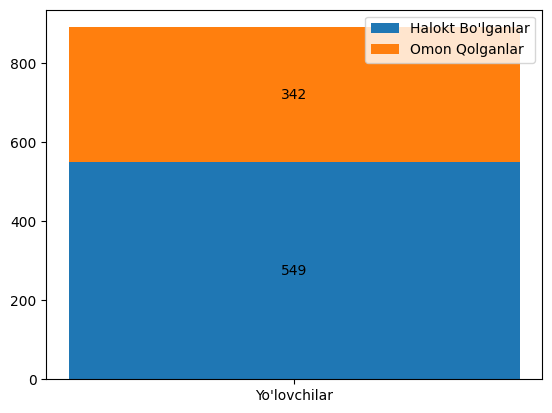

In [76]:
species = ("Yo'lovchilar")
counts = {
    "Halokt Bo'lganlar": np.array([549]),
    "Omon Qolganlar" : np.array([342]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(1)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')

#ax.set_title("Halokt bo'lganlar va Omon qolganlar")
ax.legend()

plt.show()

In [77]:
(100/(549+342)) * 342
# omon qolganlar umumiy 38.4 % ni tashkil etarkan

38.38383838383839

In [78]:
(100/(549+342)) * 549
# halokt bo'lganlar umumiy 61.6 % ni tashkil etarkan

61.61616161616162

### <center> Qaysi jins vakillari ko'proq omon qolganligini ko'ramiz

In [79]:
erkalar_omon_qolganlar = data[(data["Sex"]=="male")]["Survived"].value_counts()
erkalar_omon_qolganlar

Survived
0    468
1    109
Name: count, dtype: int64

In [80]:
ayollar_omon_qolganlar = data[(data["Sex"]=="female")]["Survived"].value_counts()
ayollar_omon_qolganlar

Survived
1    233
0     81
Name: count, dtype: int64

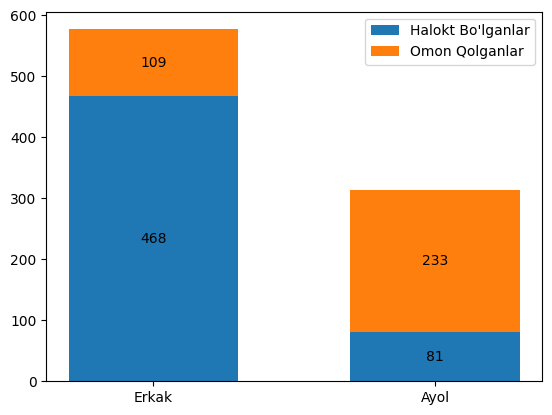

In [81]:
species = ("Erkak", "Ayol")
counts = {
    "Halokt Bo'lganlar": np.array([468, 81]),
    "Omon Qolganlar" : np.array([109,233]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(2)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')

#ax.set_title("Halokt bo'lganlar va Omon qolganlar")
ax.legend()

plt.show()

In [82]:
(100/(468+109)) * 109
# Umumiy erkaklardan 18.8 foizi omon qolipti

18.890814558058928

In [83]:
(100/(81+233)) * 233
# Umumiy Ayollarda 74.2 foizi omon qolipti

74.20382165605095

In [84]:
(100/(549+342)) * 109
# Umumiy yo'lovchilardan esa 12.2 % foizini omon qolgan erkaklar tashkil qilar ekan

12.2334455667789

In [85]:
(100/(549+342)) * 233
# Umumiy yo'lovchilardan esa 26.1 % foizini omon qolgan erkaklar tashkil qilar ekan

26.150392817059483

## <center> Qaysi portdan chiqganlar ko'proq omon qolganini ko'ramiz

In [86]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
port_S_omon_qolganlar = data[(data["Embarked"]=="S")]["Survived"].value_counts()
port_S_omon_qolganlar
# Southampton 

Survived
0    427
1    217
Name: count, dtype: int64

In [88]:
port_C_omon_qolganlar = data[(data["Embarked"]=="C")]["Survived"].value_counts()
port_C_omon_qolganlar
# Cherbourg

Survived
1    95
0    75
Name: count, dtype: int64

In [89]:
port_Q_omon_qolganlar = data[(data["Embarked"]=="Q")]["Survived"].value_counts()
port_Q_omon_qolganlar
# 

Survived
0    47
1    30
Name: count, dtype: int64

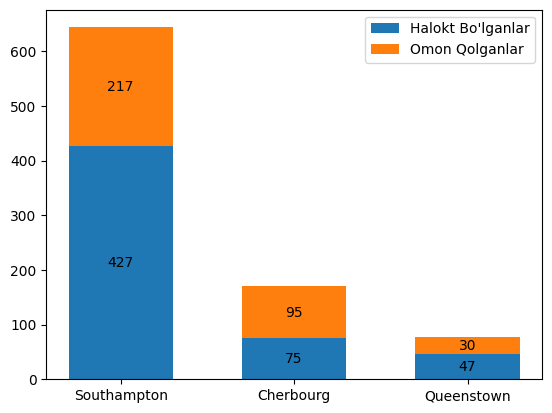

In [90]:
species = ("Southampton", "Cherbourg", "Queenstown")
counts = {
    "Halokt Bo'lganlar": np.array([427, 75, 47]),
    "Omon Qolganlar" : np.array([217,95, 30]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(3)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')

#ax.set_title("Halokt bo'lganlar va Omon qolganlar")
ax.legend()

plt.show()

In [91]:
(100/(427+217)) * 217
# Umumiy Southampton dan chiqganlardan 33.3 foizi omon qolipti

33.69565217391304

In [92]:
(100/(75+95)) * 95
# Umumiy Cherbourg dan chiqganlardan 55.8 foizi omon qolipti

55.88235294117647

In [93]:
(100/(47+30)) * 30
# Umumiy Queenstown dan chiqganlardan 38.9 foizi omon qolipti

38.96103896103896

In [94]:
(100/(549+342)) * 217
# Umumiy yo'lovchilardan Southampton dan chiqganlardan esa 24.3 foizi omon qolipti

24.354657687991022

In [95]:
(100/(549+342)) * 95
# Umumiy yo'lovchilardan Southampton dan chiqganlardan esa 10.6 foizi omon qolipti

10.662177328843995

In [96]:
(100/(549+342)) * 30
# Umumiy yo'lovchilardan Southampton dan chiqganlardan esa 3.3 foizi omon qolipti

3.367003367003367

In [97]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


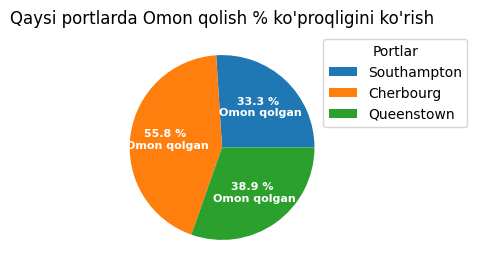

In [98]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["33.3 Southampton",
          "55.8 Cherbourg",
          "38.9 Queenstown"]

datat = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = np.round(pct/100.*np.sum(allvals),3)
    
    return  f"{absolute} % \nOmon qolgan"


wedges, texts, autotexts = ax.pie(datat, autopct=lambda pct: func(pct, datat),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Portlar",
          loc="upper center",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Qaysi portlarda Omon qolish % ko'proqligini ko'rish")

plt.show()

In [99]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> Qaysi classdagilar ko'proq omon qolganini ko'ramiz

In [100]:
class_1_omon_qolganlar = data[(data["Pclass"]==1)]["Survived"].value_counts()
class_1_omon_qolganlar 

Survived
1    136
0     80
Name: count, dtype: int64

In [101]:
class_2_omon_qolganlar = data[(data["Pclass"]==2)]["Survived"].value_counts()
class_2_omon_qolganlar 

Survived
0    97
1    87
Name: count, dtype: int64

In [102]:
class_3_omon_qolganlar = data[(data["Pclass"]==3)]["Survived"].value_counts()
class_3_omon_qolganlar 

Survived
0    372
1    119
Name: count, dtype: int64

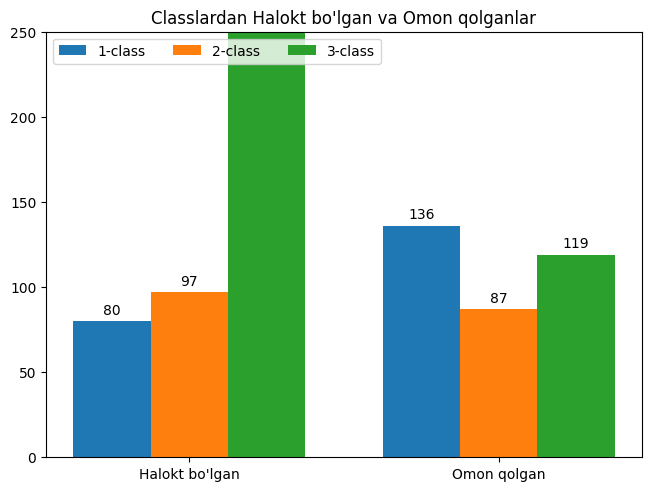

In [103]:
species = ("Halokt bo'lgan", "Omon qolgan")
penguin_means = {
    '1-class': (80,136),
    '2-class': (97,87),
    '3-class': (372,119),
}

x = np.arange(len(species))  
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_title("Classlardan Halokt bo'lgan va Omon qolganlar")
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [104]:
(100/(80+136)) * 136
# Umumiy 1-classdandagilardan 62.9 foizi omon qolipti

62.96296296296296

In [105]:
(100/(97+87)) * 87
# Umumiy 2-classdandagilardan 47.2 foizi omon qolipti

47.28260869565217

In [106]:
(100/(372+119)) * 119
# Umumiy 3-classdandagilardan 24.2 foizi omon qolipti

24.23625254582485

In [107]:
(100/(549+342)) * 136
# Umumiy yo'lovchilardan 1-classdandagilardan 15.2% foizi omon qolipti

15.26374859708193

In [108]:
(100/(549+342)) * 87
# Umumiy yo'lovchilardan 2-classdandagilardan 9.7% foizi omon qolipti

9.764309764309765

In [109]:
(100/(549+342)) * 119
# Umumiy yo'lovchilardan 3-classdandagilardan 13.3% foizi omon qolipti

13.35578002244669

In [110]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> Opa-singil, Aka-ukalardan ko'proq omon qolganini ko'ramiz

In [111]:
class_sib0_omon_qolganlar = data[(data["SibSp"]==0)]["Survived"].value_counts()
class_sib0_omon_qolganlar 

Survived
0    398
1    210
Name: count, dtype: int64

In [112]:
class_sib1_omon_qolganlar = data[(data["SibSp"]==1)]["Survived"].value_counts()
class_sib1_omon_qolganlar 

Survived
1    112
0     97
Name: count, dtype: int64

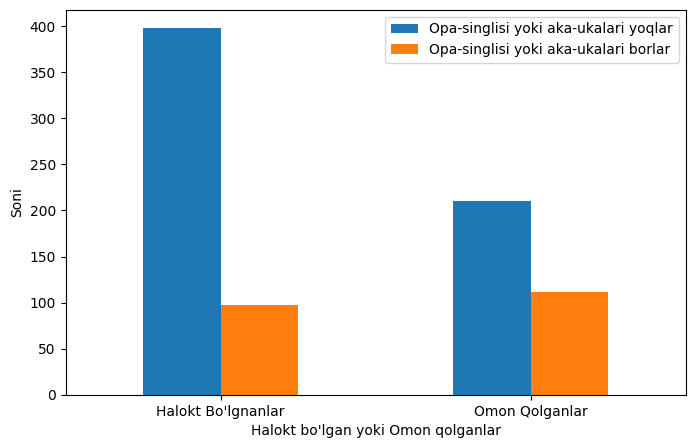

In [113]:
class_sib0_omon_qolganlar = [398, 210]
class_sib1_omon_qolganlar = [97, 112]


index = ["Halokt Bo'lgnanlar", "Omon Qolganlar"]

df = pd.DataFrame({'Opa-singlisi yoki aka-ukalari yoqlar': class_sib0_omon_qolganlar,
                   "Opa-singlisi yoki aka-ukalari borlar": class_sib1_omon_qolganlar}, index=index)

ax = df.plot.bar(rot=0, figsize=(8,5))
ax = plt.ylabel("Soni")
ax = plt.xlabel("Halokt bo'lgan yoki Omon qolganlar")

In [114]:
(100/(398+210)) * 210
# Umumiy Opa-singlisi yoki aka-ukalari yoqlarnmig 34.5 foizi omon qolipti

34.53947368421053

In [115]:
(100/(112+97)) * 112
# Umumiy Opa-singlisi yoki aka-ukalari borlarning 53.5 foizi omon qolipti

53.588516746411486

In [116]:
(100/(549+342)) * 210
# Umumiy yo'lovchilardan Opa-singlisi yoki aka-ukalari yoqlarnmig 23.5 foizi omon qolipti

23.56902356902357

In [117]:
(100/(549+342)) * 112
# Umumiy yo'lovchilardan Opa-singlisi yoki aka-ukalari borlarning 12.5 foizi omon qolipti

12.570145903479236

In [118]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <center> O-ta onaliklardan ko'proq omon qolganini ko'ramiz

In [119]:
ota_onalar_0_omon_qolganlar = data[(data["Parch"]==0)]["Survived"].value_counts()
ota_onalar_0_omon_qolganlar 

Survived
0    445
1    233
Name: count, dtype: int64

In [120]:
ota_onalar_1_omon_qolganlar = data[(data["Parch"]==1)]["Survived"].value_counts()
ota_onalar_1_omon_qolganlar 

Survived
1    65
0    53
Name: count, dtype: int64

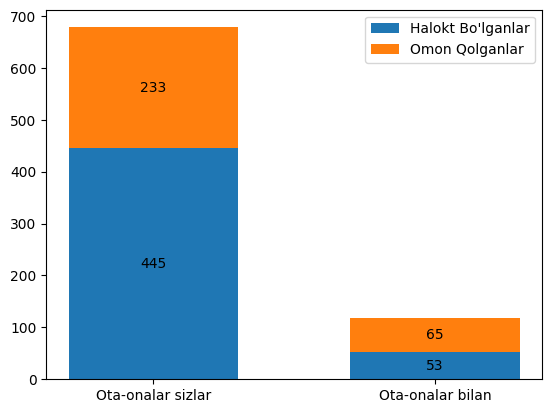

In [121]:

species = ("Ota-onalar sizlar", "Ota-onalar bilan")
counts = {
    "Halokt Bo'lganlar": np.array([445, 53]),
    "Omon Qolganlar" : np.array([233, 65]),
}
width = 0.6  # 


fig, ax = plt.subplots()
bottom = np.zeros(2)

for i, j in counts.items():
    p = ax.bar(species, j, width, label=i, bottom=bottom)
    bottom += j

    ax.bar_label(p, label_type='center')

#ax.set_title("Halokt bo'lganlar va Omon qolganlar")
ax.legend()

plt.show()

In [122]:
(100/(445+233)) * 233
# ota-onalar yoqlarda 34.3 foizi omon qolipti

34.365781710914455

In [123]:
(100/(65+53)) * 53
# ota-onalar borlar 44.9 foizi omon qolipti

44.91525423728813

In [124]:
(100/(549+342)) * 233
# Umumiy yo'lovchilar orasidan ota-onalar yo'qlarnnig 26.1 foizi omon qolipti

26.150392817059483

In [125]:
(100/(549+342)) * 53
# Umumiy yo'lovchilar orasidan ota-onalar borlar 5.9 foizi omon qolipti

5.948372615039282

----------

In [126]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [127]:
data.info()
# Cabin da 693 ta NaN qiymat bor va ularni toldirishni iloji yo'q
# Shuning uchun bu ustunni o'chirib tashlaymiz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
data.drop("Cabin", axis=1, inplace=True)

In [129]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [130]:
data.dropna(inplace=True)
# Endi Age da ham NaN qiymat borlarni ochirib tashlaymiz

In [131]:
data
# Endi umumiy datamiz 731 ta
# 160 ta data o'chirildi

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  731 non-null    int64  
 1   Survived     731 non-null    int64  
 2   Pclass       731 non-null    int64  
 3   Name         731 non-null    object 
 4   Sex          731 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        731 non-null    int64  
 7   Parch        731 non-null    int64  
 8   Ticket       731 non-null    object 
 9   Fare         731 non-null    float64
 10  Embarked     731 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 68.5+ KB


In [133]:
# PassengidId ustunini ham o'chirib tashlaymiz
data.drop("PassengerId", axis=1, inplace=True)

In [134]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [135]:
# Modelni o'qitish uchun bizga Name ustuni kerak emas uni ham o'chirib tashlaymiz
data.drop("Name", axis=1, inplace=True)

In [136]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder

# <center> Train

In [138]:
ordinal = OrdinalEncoder()
ordinal

OrdinalEncoder()

In [139]:
x_train = ordinal.fit(data.drop("Survived", axis=1))
x_train

OrdinalEncoder()

In [140]:
x_train = ordinal.transform(data.drop("Survived", axis=1))
x_train

array([[  2.,   1.,  28., ..., 417.,  16.,   2.],
       [  0.,   0.,  51., ..., 481., 181.,   0.],
       [  2.,   0.,  34., ..., 542.,  32.,   2.],
       ...,
       [  0.,   0.,  24., ...,  12., 131.,   2.],
       [  0.,   1.,  34., ...,   8., 131.,   0.],
       [  2.,   1.,  42., ..., 378.,  23.,   1.]])

In [141]:
x_train.shape

(731, 8)

In [142]:
y_train = np.array(data["Survived"])
y_train

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [143]:
rf = RandomForestClassifier()

In [144]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# <center> Test

In [145]:
data2 = pd.read_csv("Datasets/test.csv")
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [146]:
data3 = pd.read_csv("Datasets/gender_submission.csv")
data3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [147]:
data3.drop("PassengerId", axis=1, inplace=True)

In [148]:
data2.insert(1,"Survived", np.array(data3), True)
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [149]:
data2.drop(["PassengerId", "Name", "Cabin"], axis=1, inplace=True)
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


In [150]:
data2.dropna(inplace=True)
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
409,1,3,female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1,1,female,37.0,1,0,19928,90.0000,Q
412,1,3,female,28.0,0,0,347086,7.7750,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C


In [151]:
x_test = ordinal.fit(data2.drop("Survived", axis=1))
x_test

OrdinalEncoder()

In [152]:
x_test = ordinal.transform(data2.drop("Survived", axis=1))
x_test

array([[  2.,   1.,  44., ..., 128.,  20.,   1.],
       [  2.,   0.,  60., ..., 181.,   4.,   2.],
       [  1.,   1.,  73., ...,  63.,  34.,   1.],
       ...,
       [  2.,   0.,  35., ..., 150.,  17.,   2.],
       [  0.,   0.,  51., ..., 251., 133.,   0.],
       [  2.,   1.,  50., ..., 270.,   8.,   2.]])

In [153]:
y_test = np.array(data2["Survived"])
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [154]:
pct1 = rf.score(x_test, y_test)
pct1


0.9093655589123867

In [155]:
print("Aniqlik ", np.round(pct1, 2), "% chiqdi")

Aniqlik  0.91 % chiqdi


## <center> Endi faqat korelatsiyasi baland ustunlarni o'qitib ko'ramiz

# <center> Train

In [156]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [157]:
# corelatsiyani ko'rish uchun hamma datani numeric qilib olamiz
data_copy = data.copy()
data_copy['Sex']=data_copy['Sex'].astype('category').cat.codes
data_copy['Ticket']=data_copy['Ticket'].astype('category').cat.codes
data_copy['Embarked']=data_copy['Embarked'].astype('category').cat.codes
data_copy

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,417,7.2500,2
1,1,1,0,38.0,1,0,481,71.2833,0
2,1,3,0,26.0,0,0,542,7.9250,2
3,1,1,0,35.0,1,0,40,53.1000,2
4,0,3,1,35.0,0,0,380,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,385,29.1250,1
886,0,2,1,27.0,0,0,84,13.0000,2
887,1,1,0,19.0,0,0,12,30.0000,2
889,1,1,1,26.0,0,0,8,30.0000,0


<Axes: >

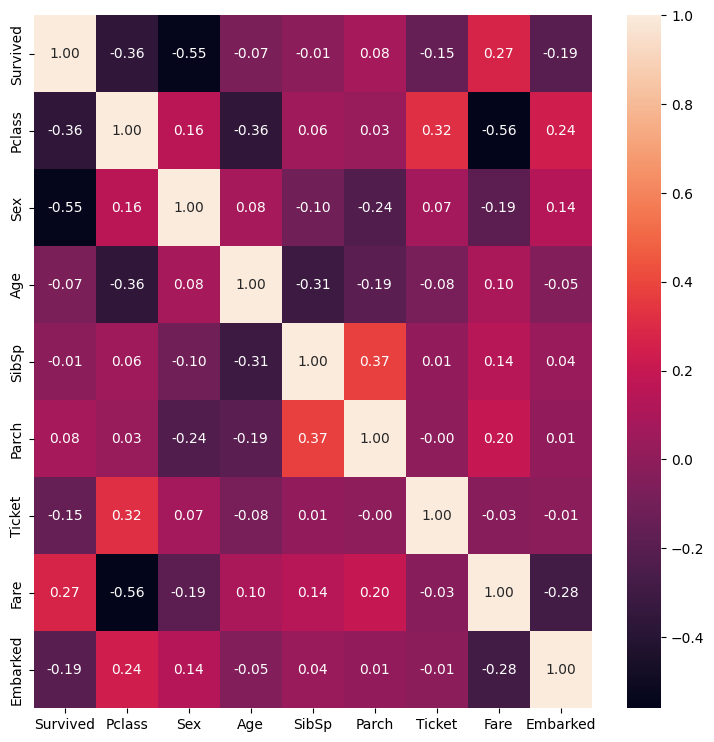

In [158]:
plt.subplots(figsize=(9,9))
sn.heatmap(data_copy.corr(numeric_only=True),annot=True, fmt='.2f')

In [159]:
data_copy.corrwith(data_copy["Survived"], numeric_only=True).sort_values()
# Demak biz Survived bo'yicha oladigan bo'lsak
# Sex, Pclass, Fare, Embarked, Ticekt,  ustunlarini olishga qaror qildik

Sex        -0.545370
Pclass     -0.361531
Embarked   -0.194619
Ticket     -0.147765
Age        -0.068832
SibSp      -0.013154
Parch       0.084448
Fare        0.272165
Survived    1.000000
dtype: float64

In [160]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [161]:
x_train2 = ordinal.fit(data.drop(["Survived", "Age", "SibSp", "Parch"], axis=1))
x_train2
# Sex, Pclass, Fare, Embarked, Ticket, SibSp, Parch

OrdinalEncoder()

In [162]:
x_train2 = ordinal.transform(data.drop(["Survived", "Age", "SibSp", "Parch"], axis=1))
x_train2

array([[  2.,   1., 417.,  16.,   2.],
       [  0.,   0., 481., 181.,   0.],
       [  2.,   0., 542.,  32.,   2.],
       ...,
       [  0.,   0.,  12., 131.,   2.],
       [  0.,   1.,   8., 131.,   0.],
       [  2.,   1., 378.,  23.,   1.]])

In [163]:
x_train2.shape

(731, 5)

In [164]:
y_train2 = np.array(data["Survived"])
y_train2

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [165]:
rf = RandomForestClassifier()

In [166]:
rf.fit(x_train2, y_train2)

RandomForestClassifier()

# <center> Test

In [167]:
data2 = pd.read_csv("Datasets/test.csv")
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [168]:
data3 = pd.read_csv("Datasets/gender_submission.csv")
data3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [169]:
data3.drop("PassengerId", axis=1, inplace=True)

In [170]:
data2.insert(1,"Survived", np.array(data3), True)
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [171]:
data2.drop(["Name", "Cabin"], axis=1, inplace=True)
data2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,NaN,0,0,359309,8.0500,S


In [172]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [173]:
data2[data2["Fare"].isna()]
# Fare ustunida bitta NaN qiymat bor shuni to'ldirish kerak

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,male,60.5,0,0,3701,NaN,S


In [174]:
data_1044 = data2[(data2["Sex"]=="male") & (data2["Pclass"]==3) & (data2["Embarked"]=="S") & (data2["Parch"]==0) & (data2["SibSp"]==0)]
data_1044


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,895,0,3,male,27.0,0,0,315154,8.6625,S
5,897,0,3,male,14.0,0,0,7538,9.2250,S
10,902,0,3,male,NaN,0,0,349220,7.8958,S
38,930,0,3,male,25.0,0,0,345768,9.5000,S
39,931,0,3,male,NaN,0,0,1601,56.4958,S
...,...,...,...,...,...,...,...,...,...,...
386,1278,0,3,male,24.0,0,0,349911,7.7750,S
398,1290,0,3,male,22.0,0,0,347065,7.7750,S
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [175]:
data_1044 = np.array(data_1044["Fare"])
data_1044

array([ 8.6625,  9.225 ,  7.8958,  9.5   , 56.4958,  7.85  ,  7.925 ,
        7.8958,  7.65  ,  7.8958,  7.75  ,  7.8958,  8.05  ,  7.8958,
        7.775 ,  8.05  ,  7.7958,  7.925 ,  8.05  ,  7.775 , 22.525 ,
        8.7125,  7.25  ,  7.7958,  8.05  ,  8.05  ,  7.8958,  7.8542,
        8.05  ,     nan,  7.55  ,  7.    ,  7.55  ,  7.8542,  7.8958,
       22.525 ,  7.05  ,  8.05  ,  8.05  ,  7.7958,  7.7958, 15.1   ,
        7.8542,  7.8875,  7.925 ,  9.325 ,  9.5   ,  7.55  ,  8.05  ,
        7.775 ,  7.8542,  7.8958,  7.55  ,  8.6625,  7.25  ,  7.25  ,
        8.05  ,  9.5   ,  7.8958,  7.8542,  7.775 ,  8.6625,  8.6625,
        7.575 ,  7.8542,  7.775 ,  7.05  ,  7.8958,  7.5792,  7.8792,
        8.6625,  7.775 ,  7.775 ,  8.05  ,  7.25  ,  8.05  ])

In [176]:
np.nansum(data_1044)/len(data_1044)

8.977080263157893

In [177]:
data2.iloc[152, 8] = 8.977

In [178]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [179]:
data2.drop(["Age", "SibSp", "Parch"], axis=1, inplace=True)
data2

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Embarked
0,892,0,3,male,330911,7.8292,Q
1,893,1,3,female,363272,7.0000,S
2,894,0,2,male,240276,9.6875,Q
3,895,0,3,male,315154,8.6625,S
4,896,1,3,female,3101298,12.2875,S
...,...,...,...,...,...,...,...
413,1305,0,3,male,A.5. 3236,8.0500,S
414,1306,1,1,female,PC 17758,108.9000,C
415,1307,0,3,male,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,359309,8.0500,S


In [180]:
data2.dropna(inplace=True)
data2

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Embarked
0,892,0,3,male,330911,7.8292,Q
1,893,1,3,female,363272,7.0000,S
2,894,0,2,male,240276,9.6875,Q
3,895,0,3,male,315154,8.6625,S
4,896,1,3,female,3101298,12.2875,S
...,...,...,...,...,...,...,...
413,1305,0,3,male,A.5. 3236,8.0500,S
414,1306,1,1,female,PC 17758,108.9000,C
415,1307,0,3,male,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,359309,8.0500,S


In [181]:
ps_index = np.array(data2["PassengerId"])
ps_index

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [182]:
x_test2 = ordinal.fit(data2.drop(["PassengerId", "Survived"], axis=1))
x_test2

OrdinalEncoder()

In [183]:
x_test2 = ordinal.transform(data2.drop(["PassengerId", "Survived"], axis=1))
x_test2

array([[  2.,   1., 152.,  24.,   1.],
       [  2.,   0., 221.,   5.,   2.],
       [  1.,   1.,  73.,  42.,   1.],
       ...,
       [  2.,   1., 346.,   9.,   2.],
       [  2.,   1., 220.,  31.,   2.],
       [  2.,   1., 105.,  85.,   0.]])

In [184]:
y_test2 = np.array(data2["Survived"])
y_test2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [185]:
pct2 = rf.score(x_test2, y_test2)
pct2

0.9138755980861244

In [186]:
print("Faqat correlatsiyasi baland ustunlarni o'qitganimizda aniqlik ", np.round(pct2, 2), "% chiqdi")


Faqat correlatsiyasi baland ustunlarni o'qitganimizda aniqlik  0.91 % chiqdi


In [187]:
sub = rf.predict(x_test2)
sub

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [188]:
d = {'PassengerId': ps_index, 'Survived': sub}
df = pd.DataFrame(data=d)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [189]:
# df.to_csv("Datasets/submissionfile.csv", index=False)

# <center> <h1> 👨‍💻   🚀  